# MNIST v2

In [1]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

random_seed = 20181401
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
total_epochs = 20
batch_size = 32
mnist_train = datasets.MNIST(root="datasets/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="datasets/", train=False, transform=transforms.ToTensor(), download=True)
mnist_train_dataloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
mnist_test_dataloader = DataLoader(mnist_test, batch_size=batch_size)

print("X:", mnist_train.data.shape)
print("Y:", mnist_train.targets.shape)

X: torch.Size([60000, 28, 28])
Y: torch.Size([60000])


In [3]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(28 * 28, 10)

  def forward(self, x):
    return torch.log_softmax(self.linear(x), dim=1)

In [4]:
model = MnistModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [5]:
def calculate_accurancy():
  with torch.no_grad():
    accurancy = 0
    batch_count = len(mnist_test_dataloader)

    for x, y in mnist_test_dataloader:
      assert isinstance(x, torch.Tensor)
      assert isinstance(y, torch.Tensor)
      x = x.view(-1, 28 * 28).to(device)
      y = y.to(device)

      hypothesis = model(x)
      prediction = hypothesis.argmax(dim=1)
      correct_prediction = (prediction == y)
      accurancy += correct_prediction.float().mean().item() / batch_count
  
    return accurancy

In [6]:
print("epoch =", 0, "/", "accurancy = {:.3f}%".format(calculate_accurancy() * 100))

for epoch in range(total_epochs):
  avg_cost = 0
  batch_count = len(mnist_train_dataloader)

  for iteration, (x, y) in enumerate(mnist_train_dataloader):
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    x = x.view(-1, 28 * 28).to(device)
    y = y.to(device)

    hypothesis = model(x)
    cost = nn.functional.nll_loss(hypothesis, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    avg_cost += cost.item() / batch_count
  
  print("epoch =", (epoch + 1), "/", "cost =", avg_cost, "/", "accurancy = {:.3f}%".format(calculate_accurancy() * 100))

epoch = 0 / accurancy = 13.758%
epoch = 1 / cost = 1.1054339860598255 / accurancy = 86.631%
epoch = 2 / cost = 0.5459065924326582 / accurancy = 89.227%
epoch = 3 / cost = 0.43425540360609677 / accurancy = 90.335%
epoch = 4 / cost = 0.38573906459410917 / accurancy = 90.895%
epoch = 5 / cost = 0.3587551526347791 / accurancy = 91.094%
epoch = 6 / cost = 0.34136607712507216 / accurancy = 91.324%
epoch = 7 / cost = 0.32917928226391463 / accurancy = 91.464%
epoch = 8 / cost = 0.3198486466010418 / accurancy = 91.603%
epoch = 9 / cost = 0.31260424472093595 / accurancy = 91.723%
epoch = 10 / cost = 0.30681140503287346 / accurancy = 91.773%
epoch = 11 / cost = 0.3017989447752633 / accurancy = 91.913%
epoch = 12 / cost = 0.2975873222788171 / accurancy = 92.053%
epoch = 13 / cost = 0.29402066812714 / accurancy = 92.023%
epoch = 14 / cost = 0.29082159511844285 / accurancy = 92.043%
epoch = 15 / cost = 0.28799551347295466 / accurancy = 92.173%
epoch = 16 / cost = 0.2855264246225354 / accurancy = 92.

Label: 0
Prediction: 0 (98.860%)


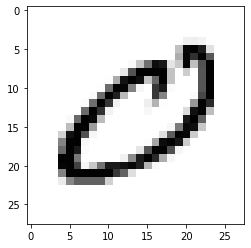

Label: 9
Prediction: 9 (95.500%)


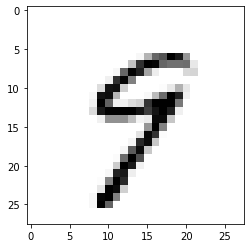

Label: 6
Prediction: 6 (99.373%)


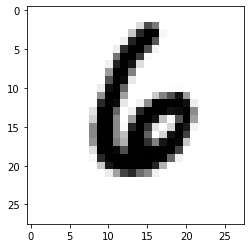

Label: 0
Prediction: 0 (99.971%)


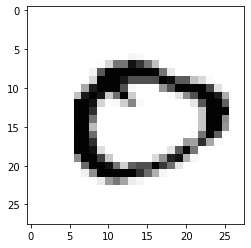

Label: 7
Prediction: 7 (99.695%)


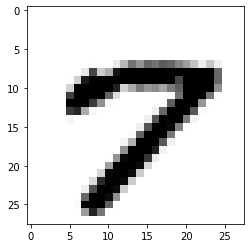

Label: 3
Prediction: 5 (54.825%)


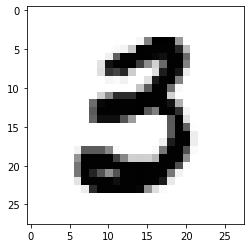

Label: 6
Prediction: 6 (99.513%)


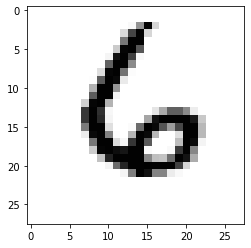

Label: 0
Prediction: 0 (49.388%)


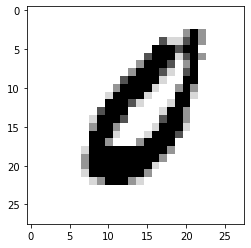

Label: 4
Prediction: 4 (99.926%)


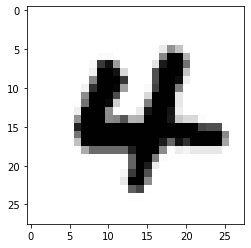

Label: 3
Prediction: 3 (99.210%)


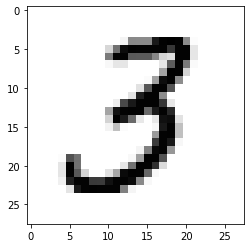

Label: 8
Prediction: 8 (96.820%)


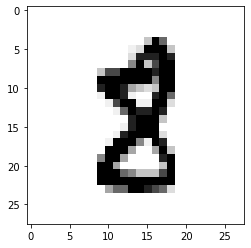

Label: 3
Prediction: 3 (47.228%)


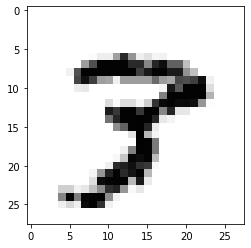

Label: 0
Prediction: 0 (99.633%)


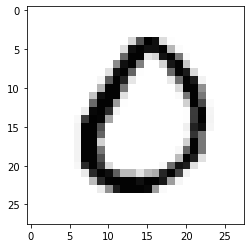

Label: 6
Prediction: 6 (74.818%)


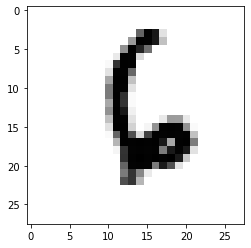

Label: 9
Prediction: 9 (52.481%)


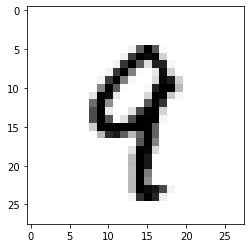

Label: 6
Prediction: 6 (98.842%)


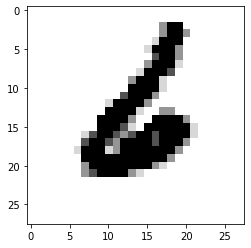

Label: 0
Prediction: 0 (98.425%)


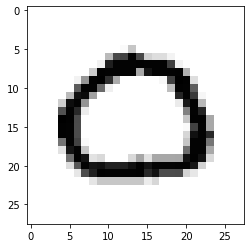

Label: 8
Prediction: 8 (88.378%)


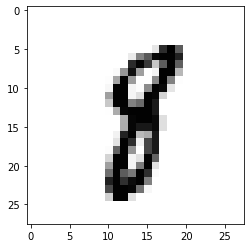

Label: 1
Prediction: 1 (89.029%)


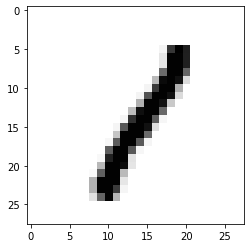

Label: 3
Prediction: 3 (99.692%)


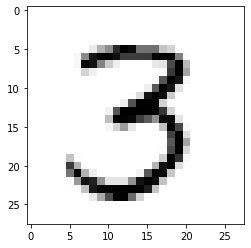

In [7]:
with torch.no_grad():
  for x, y in itertools.islice(DataLoader(mnist_test, batch_size=1, shuffle=True), 20):
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    x = x.view(-1, 28 * 28).to(device)
    y = y.to(device)

    hypothesis = model(x)
    prediction = hypothesis.argmax(dim=1).item()
    prediction_percent = hypothesis.max(dim=1)[0].exp().item() * 100

    print("Label:", y.item())
    print("Prediction:", prediction, "({:.3f}%)".format(prediction_percent))
    plt.imshow(x.cpu().view(28, 28), cmap=plt.cm.Greys, interpolation="nearest")
    plt.show()